In [1]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

class SoccerTracker:
    def __init__(self):
        self.player_tracks = defaultdict(list)
        self.next_id = 0
        self.min_contour_area = 100
        self.max_distance = 50
        
    def preprocess_frame(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((5,5), np.uint8)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        return thresh
    
    def detect_players(self, binary_frame):
        contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
        detections = []
        for contour in contours:
            if cv2.contourArea(contour) > self.min_contour_area:
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detections.append((cx, cy))
        return detections
    
    def update_tracks(self, detections):
        if not self.player_tracks:
            for det in detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
            return
        
        cost_matrix = np.zeros((len(detections), len(self.player_tracks)))
        for i, det in enumerate(detections):
            for j, track_id in enumerate(self.player_tracks.keys()):
                last_pos = self.player_tracks[track_id][-1]
                distance = np.sqrt((det[0] - last_pos[0])**2 + (det[1] - last_pos[1])**2)
                cost_matrix[i][j] = distance
        
        assigned_tracks = set()
        assigned_detections = set()
        
        while True:
            if np.min(cost_matrix) > self.max_distance:
                break
                
            i, j = np.unravel_index(np.argmin(cost_matrix), cost_matrix.shape)
            if i in assigned_detections or j in assigned_tracks:
                cost_matrix[i][j] = float('inf')
                continue
                
            track_id = list(self.player_tracks.keys())[j]
            self.player_tracks[track_id].append(detections[i])
            assigned_detections.add(i)
            assigned_tracks.add(j)
            cost_matrix[i][j] = float('inf')
        
        for i, det in enumerate(detections):
            if i not in assigned_detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
    
    def visualize_tracks(self, frame):
        output = frame.copy()
        for track_id, positions in self.player_tracks.items():
            if len(positions) > 1:
                points = np.array(positions, dtype=np.int32)
                cv2.polylines(output, [points], False, (0, 255, 0), 2)
            
            if positions:
                current_pos = positions[-1]
                cv2.circle(output, current_pos, 5, (0, 0, 255), -1)
                cv2.putText(output, str(track_id), 
                          (current_pos[0] + 10, current_pos[1] + 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        return output

In [1]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

class SoccerTracker:
    def __init__(self):
        self.player_tracks = defaultdict(list)
        self.next_id = 0
        self.min_contour_area = 100
        self.max_distance = 50
        
    def preprocess_frame(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((5,5), np.uint8)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        return thresh
    
    def detect_players(self, binary_frame):
        contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
        detections = []
        for contour in contours:
            if cv2.contourArea(contour) > self.min_contour_area:
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detections.append((cx, cy))
        return detections
    
    def update_tracks(self, detections):
        if not self.player_tracks:
            for det in detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
            return
        
        cost_matrix = np.zeros((len(detections), len(self.player_tracks)))
        for i, det in enumerate(detections):
            for j, track_id in enumerate(self.player_tracks.keys()):
                last_pos = self.player_tracks[track_id][-1]
                distance = np.sqrt((det[0] - last_pos[0])**2 + (det[1] - last_pos[1])**2)
                cost_matrix[i][j] = distance
        
        assigned_tracks = set()
        assigned_detections = set()
        
        while True:
            if np.min(cost_matrix) > self.max_distance:
                break
                
            i, j = np.unravel_index(np.argmin(cost_matrix), cost_matrix.shape)
            if i in assigned_detections or j in assigned_tracks:
                cost_matrix[i][j] = float('inf')
                continue
                
            track_id = list(self.player_tracks.keys())[j]
            self.player_tracks[track_id].append(detections[i])
            assigned_detections.add(i)
            assigned_tracks.add(j)
            cost_matrix[i][j] = float('inf')
        
        for i, det in enumerate(detections):
            if i not in assigned_detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
    
    def visualize_tracks(self, frame):
        output = frame.copy()
        for track_id, positions in self.player_tracks.items():
            if len(positions) > 1:
                points = np.array(positions, dtype=np.int32)
                cv2.polylines(output, [points], False, (0, 255, 0), 2)
            
            if positions:
                current_pos = positions[-1]
                cv2.circle(output, current_pos, 5, (0, 0, 255), -1)
                cv2.putText(output, str(track_id), 
                          (current_pos[0] + 10, current_pos[1] + 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        return output

In [1]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

class SoccerTracker:
    def __init__(self):
        self.player_tracks = defaultdict(list)
        self.next_id = 0
        self.min_contour_area = 100
        self.max_distance = 50
        
    def preprocess_frame(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((5,5), np.uint8)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        return thresh
    
    def detect_players(self, binary_frame):
        contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
        detections = []
        for contour in contours:
            if cv2.contourArea(contour) > self.min_contour_area:
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detections.append((cx, cy))
        return detections
    
    def update_tracks(self, detections):
        if not self.player_tracks:
            for det in detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
            return
        
        cost_matrix = np.zeros((len(detections), len(self.player_tracks)))
        for i, det in enumerate(detections):
            for j, track_id in enumerate(self.player_tracks.keys()):
                last_pos = self.player_tracks[track_id][-1]
                distance = np.sqrt((det[0] - last_pos[0])**2 + (det[1] - last_pos[1])**2)
                cost_matrix[i][j] = distance
        
        assigned_tracks = set()
        assigned_detections = set()
        
        while True:
            if np.min(cost_matrix) > self.max_distance:
                break
                
            i, j = np.unravel_index(np.argmin(cost_matrix), cost_matrix.shape)
            if i in assigned_detections or j in assigned_tracks:
                cost_matrix[i][j] = float('inf')
                continue
                
            track_id = list(self.player_tracks.keys())[j]
            self.player_tracks[track_id].append(detections[i])
            assigned_detections.add(i)
            assigned_tracks.add(j)
            cost_matrix[i][j] = float('inf')
        
        for i, det in enumerate(detections):
            if i not in assigned_detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
    
    def visualize_tracks(self, frame):
        output = frame.copy()
        for track_id, positions in self.player_tracks.items():
            if len(positions) > 1:
                points = np.array(positions, dtype=np.int32)
                cv2.polylines(output, [points], False, (0, 255, 0), 2)
            
            if positions:
                current_pos = positions[-1]
                cv2.circle(output, current_pos, 5, (0, 0, 255), -1)
                cv2.putText(output, str(track_id), 
                          (current_pos[0] + 10, current_pos[1] + 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        return output

In [2]:
video_path = 'football.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError(f"Error: Could not open video file at {video_path}")

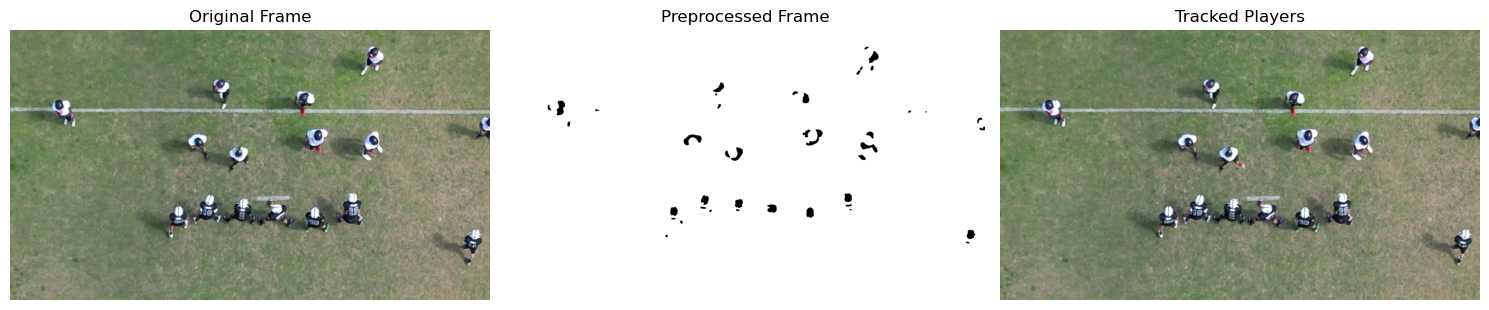

In [3]:
ret, frame = cap.read()
if ret:
    tracker = SoccerTracker()
    
    # Process frame
    binary_frame = tracker.preprocess_frame(frame)
    detections = tracker.detect_players(binary_frame)
    tracker.update_tracks(detections)
    
    # Visualize results
    output_frame = tracker.visualize_tracks(frame)
    
    # Display results using matplotlib
    plt.figure(figsize=(15,5))
    
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Original Frame')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(binary_frame, cmap='gray')
    plt.title('Preprocessed Frame')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
    plt.title('Tracked Players')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [4]:
def process_video(num_frames=50):
    tracker = SoccerTracker()
    frames = []
    
    for _ in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break
            
        binary_frame = tracker.preprocess_frame(frame)
        detections = tracker.detect_players(binary_frame)
        tracker.update_tracks(detections)
        output_frame = tracker.visualize_tracks(frame)
        frames.append(output_frame)
    
    return frames

In [ ]:
cap.release()

Processed 1 frames
Detected 1 players in current frame


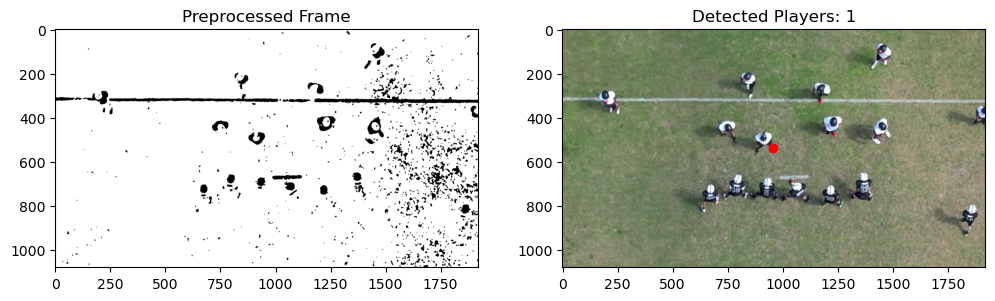

Processed 11 frames
Detected 1 players in current frame


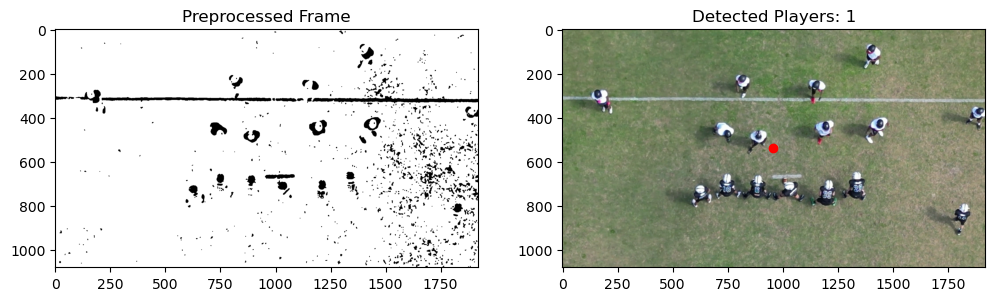

Processed 21 frames
Detected 4 players in current frame


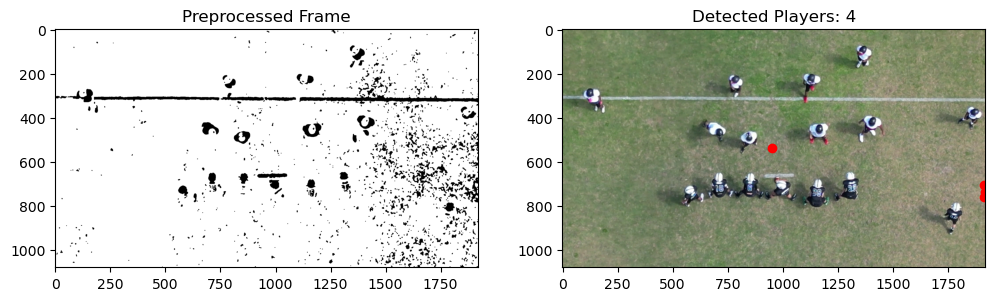

Processed 31 frames
Detected 2 players in current frame


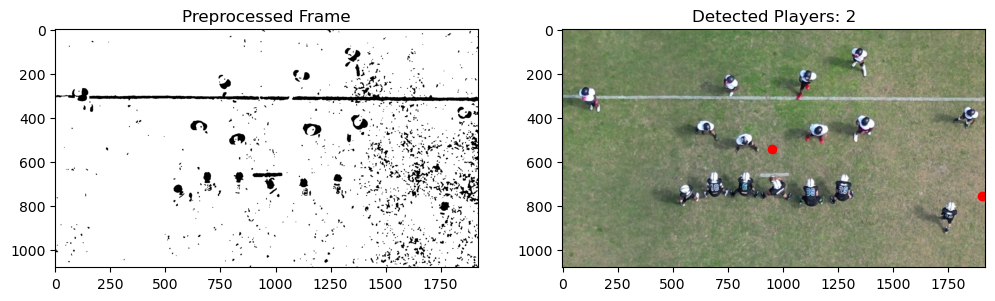

Processed 41 frames
Detected 2 players in current frame


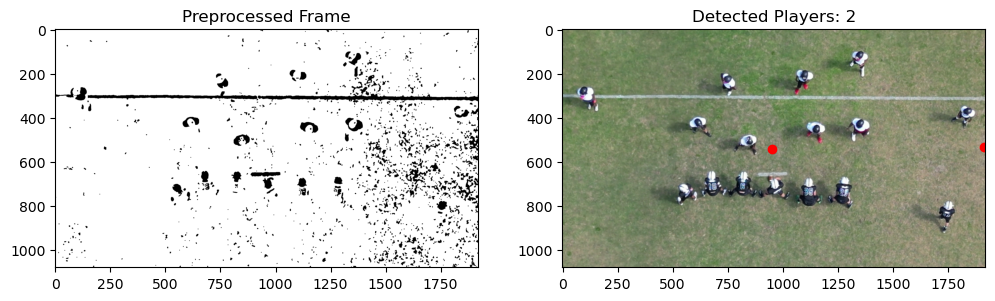

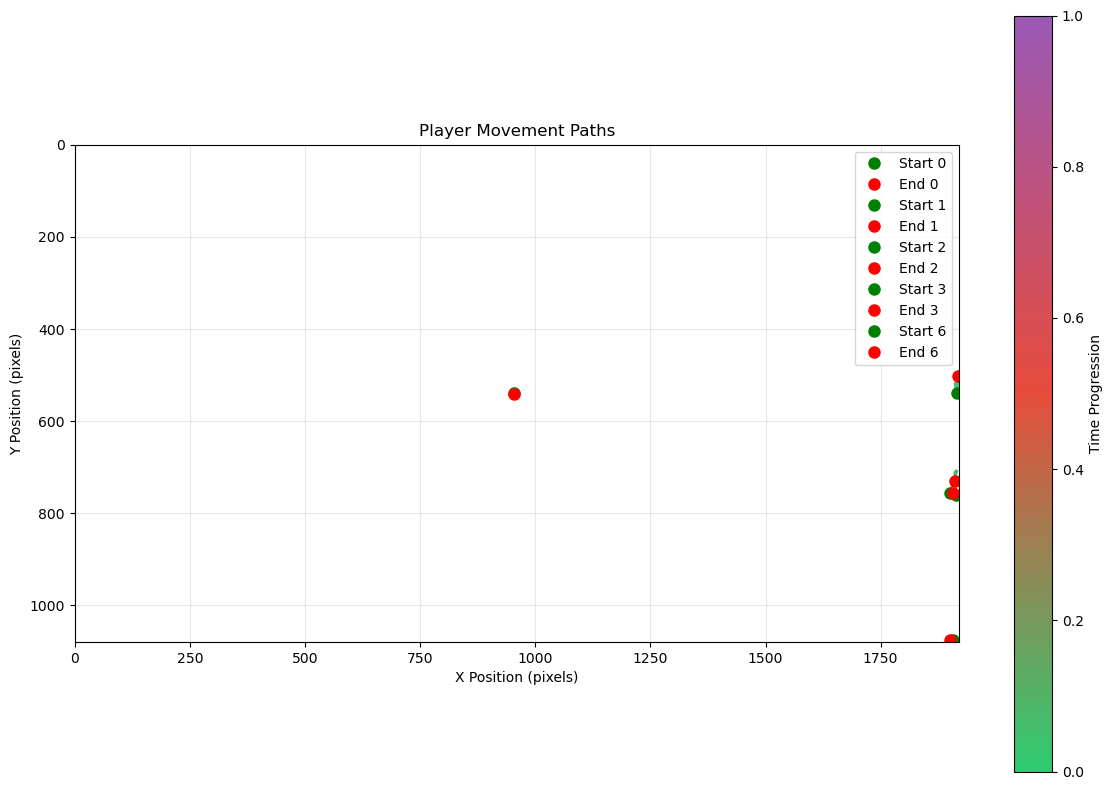

In [7]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

class SoccerTracker:
    def __init__(self):
        self.player_tracks = defaultdict(list)
        self.next_id = 0
        self.min_contour_area = 50  # Reduced to detect smaller players
        self.max_distance = 100  # Increased to maintain tracks better
        
    def preprocess_frame(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        # Adjusted threshold value to detect more players
        _, thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((3,3), np.uint8)  # Smaller kernel
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        return thresh

    # [Previous detect_players and update_tracks methods remain the same]
    def detect_players(self, binary_frame):
        contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
        detections = []
        for contour in contours:
            if cv2.contourArea(contour) > self.min_contour_area:
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detections.append((cx, cy))
        return detections
    
    def update_tracks(self, detections):
        if not self.player_tracks:
            for det in detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
            return
        
        cost_matrix = np.zeros((len(detections), len(self.player_tracks)))
        for i, det in enumerate(detections):
            for j, track_id in enumerate(self.player_tracks.keys()):
                last_pos = self.player_tracks[track_id][-1]
                distance = np.sqrt((det[0] - last_pos[0])**2 + (det[1] - last_pos[1])**2)
                cost_matrix[i][j] = distance
        
        assigned_tracks = set()
        assigned_detections = set()
        
        while True:
            if np.min(cost_matrix) > self.max_distance:
                break
                
            i, j = np.unravel_index(np.argmin(cost_matrix), cost_matrix.shape)
            if i in assigned_detections or j in assigned_tracks:
                cost_matrix[i][j] = float('inf')
                continue
                
            track_id = list(self.player_tracks.keys())[j]
            self.player_tracks[track_id].append(detections[i])
            assigned_detections.add(i)
            assigned_tracks.add(j)
            cost_matrix[i][j] = float('inf')
        
        for i, det in enumerate(detections):
            if i not in assigned_detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1

def visualize_paths(tracker, frame_shape, min_track_length=5):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal')
    
    colors = [(0.0, '#2ecc71'), (0.5, '#e74c3c'), (1.0, '#9b59b6')]
    custom_cmap = LinearSegmentedColormap.from_list('custom', colors)
    
    for track_id, positions in tracker.player_tracks.items():
        if len(positions) < min_track_length:
            continue
            
        points = np.array(positions)
        segments = np.concatenate([points[:-1, None], points[1:, None]], axis=1)
        
        norm = plt.Normalize(0, len(segments))
        lc = LineCollection(segments, cmap=custom_cmap, norm=norm)
        lc.set_array(np.linspace(0, 1, len(segments)))
        lc.set_linewidth(2)
        
        ax.add_collection(lc)
        
        ax.plot(points[0, 0], points[0, 1], 'go', markersize=8, label=f'Start {track_id}')
        ax.plot(points[-1, 0], points[-1, 1], 'ro', markersize=8, label=f'End {track_id}')
    
    ax.set_xlim(0, frame_shape[1])
    ax.set_ylim(frame_shape[0], 0)
    ax.set_xlabel('X Position (pixels)')
    ax.set_ylabel('Y Position (pixels)')
    ax.set_title('Player Movement Paths')
    
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Fixed colorbar
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(0, 1))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Time Progression')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return fig

# Main execution
video_path = 'football.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)
tracker = SoccerTracker()

if not cap.isOpened():
    raise ValueError(f"Error: Could not open video file at {video_path}")

# Process frames
num_frames = 50  # Adjust this number based on how many frames you want to process
processed_frames = []

try:
    for frame_idx in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break
            
        # Show preprocessing result every 10 frames
        binary_frame = tracker.preprocess_frame(frame)
        detections = tracker.detect_players(binary_frame)
        tracker.update_tracks(detections)
        
        if frame_idx % 10 == 0:
            print(f"Processed {frame_idx + 1} frames")
            print(f"Detected {len(detections)} players in current frame")
            
            # Display binary frame and detections
            plt.figure(figsize=(12, 4))
            plt.subplot(121)
            plt.imshow(binary_frame, cmap='gray')
            plt.title('Preprocessed Frame')
            
            plt.subplot(122)
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            for x, y in detections:
                plt.plot(x, y, 'ro')
            plt.title(f'Detected Players: {len(detections)}')
            plt.show()
    
    # Create final visualization
    fig = visualize_paths(tracker, frame.shape)
    plt.show()
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

finally:
    cap.release()
    cv2.destroyAllWindows()

Processed 1 frames
Tracking 5 players
Processed 11 frames
Tracking 5 players
Processed 21 frames
Tracking 5 players
Processed 31 frames
Tracking 5 players
Processed 41 frames
Tracking 5 players
Processed 51 frames
Tracking 5 players
Processed 61 frames
Tracking 5 players
Processed 71 frames
Tracking 5 players
Processed 81 frames
Tracking 5 players
Processed 91 frames
Tracking 5 players
Processed 101 frames
Tracking 5 players
Processed 111 frames
Tracking 5 players
Processed 121 frames
Tracking 5 players
Processed 131 frames
Tracking 5 players
Processed 141 frames
Tracking 5 players
Processed 151 frames
Tracking 5 players
Processed 161 frames
Tracking 5 players
Processed 171 frames
Tracking 5 players
Processed 181 frames
Tracking 5 players
Processed 191 frames
Tracking 5 players


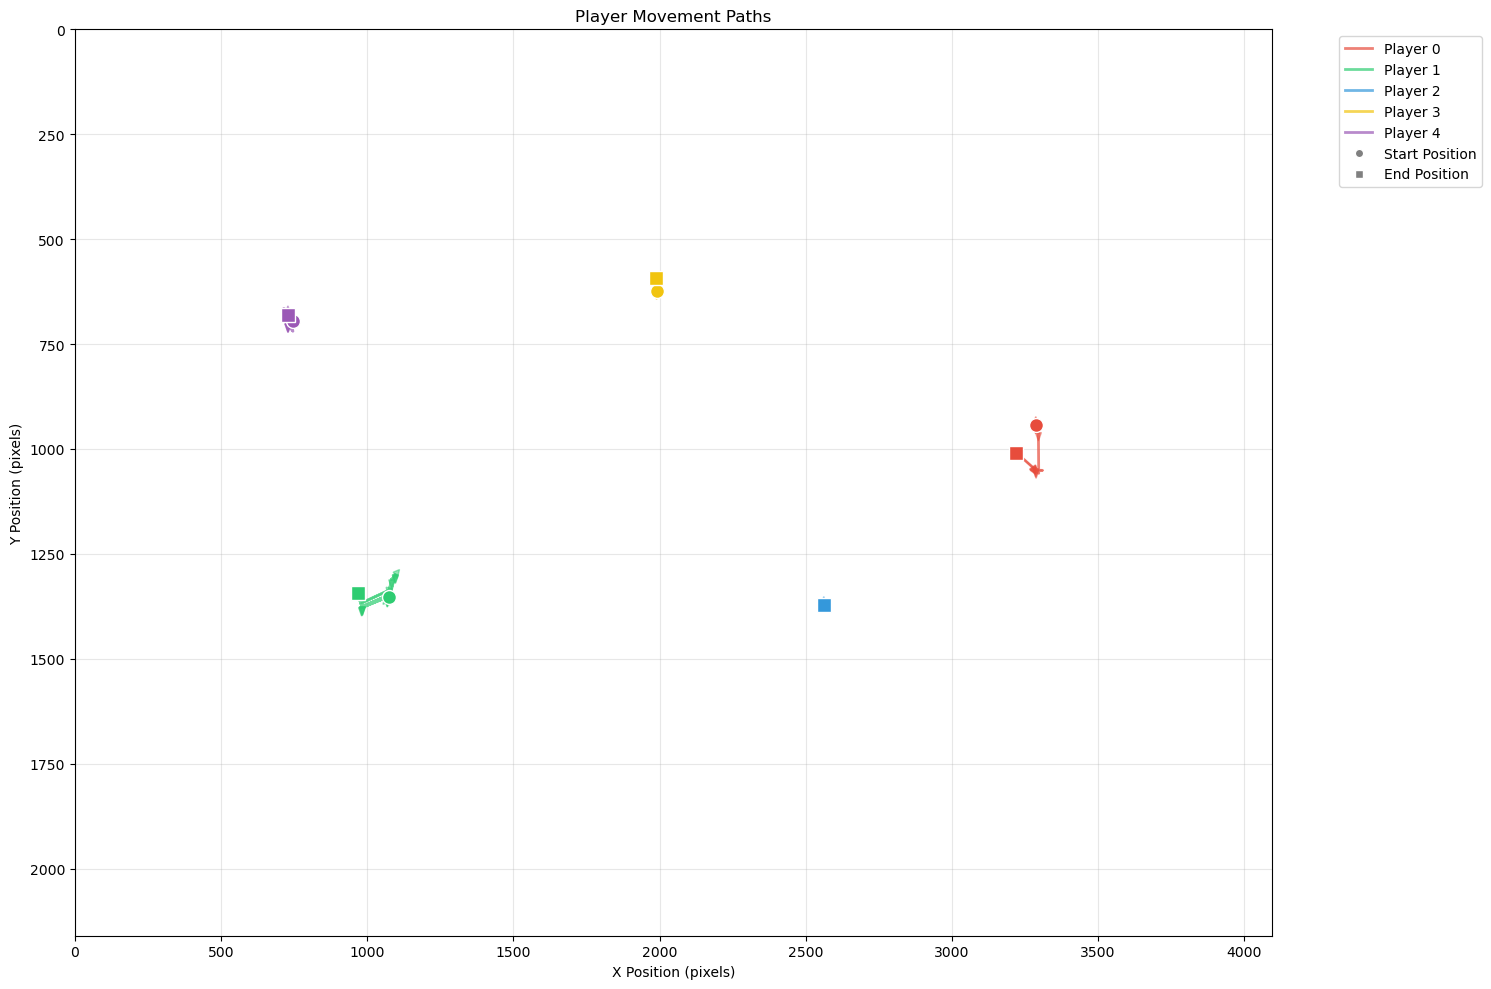


Tracking Summary:
Player 0: tracked for 103 frames, total distance: 414.3 pixels
Player 1: tracked for 164 frames, total distance: 1909.3 pixels
Player 2: tracked for 6 frames, total distance: 42.5 pixels
Player 3: tracked for 13 frames, total distance: 91.4 pixels
Player 4: tracked for 170 frames, total distance: 680.5 pixels


In [6]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

class SoccerTracker:
    def __init__(self, num_players=5):
        self.player_tracks = defaultdict(list)
        self.next_id = 0
        self.num_players = num_players
        self.min_contour_area = 50
        self.max_distance = 100
        
    def preprocess_frame(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((3,3), np.uint8)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        return thresh
    
    def detect_players(self, binary_frame):
        contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
        
        # Sort contours by area to get the largest ones
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        
        detections = []
        for contour in contours[:self.num_players]:  # Only take the largest contours
            if cv2.contourArea(contour) > self.min_contour_area:
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detections.append((cx, cy))
        return detections
    
    def update_tracks(self, detections):
        if not self.player_tracks:
            # Initialize tracks for the first frame
            for i, det in enumerate(detections[:self.num_players]):
                self.player_tracks[i] = [det]
            return
        
        cost_matrix = np.zeros((len(detections), len(self.player_tracks)))
        for i, det in enumerate(detections):
            for j, track_id in enumerate(self.player_tracks.keys()):
                last_pos = self.player_tracks[track_id][-1]
                distance = np.sqrt((det[0] - last_pos[0])**2 + (det[1] - last_pos[1])**2)
                cost_matrix[i][j] = distance
        
        # Simple greedy assignment
        assigned_tracks = set()
        assigned_detections = set()
        
        while True:
            if np.min(cost_matrix) > self.max_distance:
                break
                
            i, j = np.unravel_index(np.argmin(cost_matrix), cost_matrix.shape)
            if i in assigned_detections or j in assigned_tracks:
                cost_matrix[i][j] = float('inf')
                continue
                
            track_id = list(self.player_tracks.keys())[j]
            self.player_tracks[track_id].append(detections[i])
            assigned_detections.add(i)
            assigned_tracks.add(j)
            cost_matrix[i][j] = float('inf')

def plot_player_paths(tracker, frame_shape):
    plt.figure(figsize=(15, 10))
    
    # Define distinct colors for each player
    colors = ['#e74c3c', '#2ecc71', '#3498db', '#f1c40f', '#9b59b6']
    
    for player_id, positions in tracker.player_tracks.items():
        if len(positions) < 2:  # Skip if not enough positions
            continue
            
        # Convert positions to numpy arrays for easier plotting
        positions = np.array(positions)
        
        # Plot the path
        plt.plot(positions[:, 0], positions[:, 1], 
                color=colors[player_id], 
                linewidth=2, 
                label=f'Player {player_id}',
                alpha=0.7)
        
        # Plot start point
        plt.plot(positions[0, 0], positions[0, 1], 
                'o', 
                color=colors[player_id], 
                markersize=10,
                markeredgecolor='white')
        
        # Plot end point
        plt.plot(positions[-1, 0], positions[-1, 1], 
                's', 
                color=colors[player_id], 
                markersize=10,
                markeredgecolor='white')
        
        # Add direction arrows
        for i in range(0, len(positions) - 1, 10):  # Add arrow every 10 points
            plt.arrow(positions[i, 0], positions[i, 1],
                     positions[i+1, 0] - positions[i, 0],
                     positions[i+1, 1] - positions[i, 1],
                     color=colors[player_id], 
                     head_width=20,
                     head_length=20,
                     alpha=0.5)
    
    plt.xlim(0, frame_shape[1])
    plt.ylim(frame_shape[0], 0)  # Invert Y axis to match image coordinates
    plt.xlabel('X Position (pixels)')
    plt.ylabel('Y Position (pixels)')
    plt.title('Player Movement Paths')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Add legend explaining markers
    plt.plot([], [], 'o', color='gray', label='Start Position', markeredgecolor='white')
    plt.plot([], [], 's', color='gray', label='End Position', markeredgecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf()

# Main execution
video_path = 'soccer.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)
tracker = SoccerTracker(num_players=5)

if not cap.isOpened():
    raise ValueError(f"Error: Could not open video file at {video_path}")

try:
    for frame_idx in range(200):  # Process 50 frames
        ret, frame = cap.read()
        if not ret:
            break
            
        binary_frame = tracker.preprocess_frame(frame)
        detections = tracker.detect_players(binary_frame)
        tracker.update_tracks(detections)
        
        if frame_idx % 10 == 0:
            print(f"Processed {frame_idx + 1} frames")
            print(f"Tracking {len(tracker.player_tracks)} players")
    
    # Create final visualization
    fig = plot_player_paths(tracker, frame.shape)
    plt.show()
    
    # Print tracking statistics
    print("\nTracking Summary:")
    for player_id, positions in tracker.player_tracks.items():
        total_distance = 0
        for i in range(len(positions)-1):
            dx = positions[i+1][0] - positions[i][0]
            dy = positions[i+1][1] - positions[i][1]
            total_distance += np.sqrt(dx*dx + dy*dy)
        print(f"Player {player_id}: tracked for {len(positions)} frames, total distance: {total_distance:.1f} pixels")
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

finally:
    cap.release()
    cv2.destroyAllWindows()

Processed 1 frames
Processed 11 frames
Processed 21 frames
Processed 31 frames
Processed 41 frames
Processed 51 frames
Processed 61 frames
Processed 71 frames
Processed 81 frames
Processed 91 frames
Processed 101 frames
Processed 111 frames
Processed 121 frames
Processed 131 frames
Processed 141 frames
Processed 151 frames
Processed 161 frames
Processed 171 frames
Processed 181 frames
Processed 191 frames

Player Statistics:
--------------------------------------------------

Player 0:
Total Distance: 65.6 feet
Average Speed: 6.7 mph

Player 1:
Total Distance: 42.6 feet
Average Speed: 4.4 mph

Player 2:
Total Distance: 3.1 feet
Average Speed: 0.3 mph

Player 3:
Total Distance: 15.1 feet
Average Speed: 1.5 mph

Player 4:
Total Distance: 29.4 feet
Average Speed: 3.0 mph


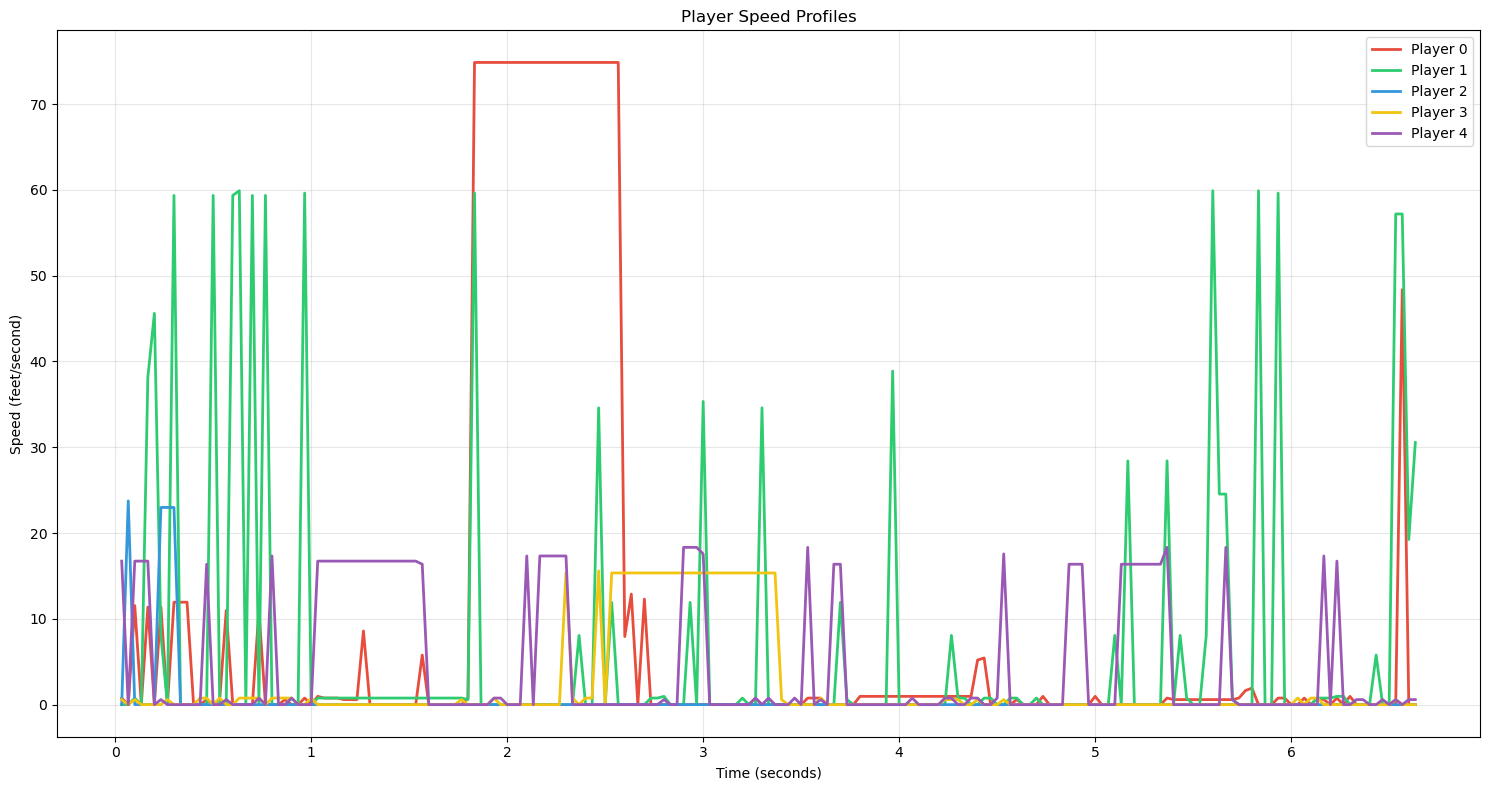

In [15]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

# Standard soccer field dimensions in feet
FIELD_LENGTH_FT = 80  # Length of field (longer dimension)
FIELD_WIDTH_FT = 55    # Width of field (shorter dimension)
FRAME_RATE = 30        # Assuming 30 fps, adjust based on your video

class PlayerMetrics:
    def __init__(self, frame_shape):
        self.frame_height, self.frame_width = frame_shape[:2]
        # Calculate conversion factors (pixels to feet)
        self.pixels_to_feet_x = FIELD_LENGTH_FT / self.frame_width
        self.pixels_to_feet_y = FIELD_WIDTH_FT / self.frame_height
        
        # Initialize storage for player metrics
        self.player_distances = defaultdict(float)  # Total distance in feet
        self.player_speeds = defaultdict(list)      # Speed at each frame
        self.player_positions_feet = defaultdict(list)  # Positions in feet
        self.timestamps = []  # Track frame timestamps
        
    def pixel_to_feet(self, x, y):
        """Convert pixel coordinates to feet"""
        feet_x = x * self.pixels_to_feet_x
        feet_y = y * self.pixels_to_feet_y
        return feet_x, feet_y
    
    def update_player_metrics(self, player_tracks, frame_number):
        """Update metrics for all players in current frame"""
        timestamp = frame_number / FRAME_RATE  # Convert frame number to seconds
        self.timestamps.append(timestamp)
        
        for player_id, positions in player_tracks.items():
            if len(positions) < 2:  # Need at least 2 positions to calculate speed
                continue
                
            # Get current and previous positions
            curr_pos = positions[-1]
            prev_pos = positions[-2]
            
            # Convert positions to feet
            curr_x, curr_y = self.pixel_to_feet(curr_pos[0], curr_pos[1])
            prev_x, prev_y = self.pixel_to_feet(prev_pos[0], prev_pos[1])
            
            # Calculate distance in feet
            dx = curr_x - prev_x
            dy = curr_y - prev_y
            distance = np.sqrt(dx*dx + dy*dy)
            
            # Update total distance
            self.player_distances[player_id] += distance
            
            # Calculate speed (feet per second)
            if len(self.timestamps) >= 2:
                dt = self.timestamps[-1] - self.timestamps[-2]
                speed = distance / dt if dt > 0 else 0
                self.player_speeds[player_id].append(speed)
            
            # Store position in feet
            self.player_positions_feet[player_id].append((curr_x, curr_y))
    
    def get_player_stats(self, player_id):
        """Get comprehensive stats for a player"""
        if player_id not in self.player_distances:
            return None
            
        speeds = self.player_speeds[player_id]
        stats = {
            'total_distance_ft': self.player_distances[player_id],
            'avg_speed_fps': np.mean(speeds) if speeds else 0,
            'max_speed_fps': np.max(speeds) if speeds else 0,
            'avg_speed_mph': np.mean(speeds) * 0.681818 if speeds else 0,  # Convert fps to mph
            'max_speed_mph': np.max(speeds) * 0.681818 if speeds else 0
        }
        return stats
    
    def plot_speed_profiles(self):
        """Plot speed profiles for all players"""
        plt.figure(figsize=(15, 8))
        colors = ['#e74c3c', '#2ecc71', '#3498db', '#f1c40f', '#9b59b6']
        
        for player_id, speeds in self.player_speeds.items():
            if len(speeds) < 2:
                continue
                
            timestamps = self.timestamps[-len(speeds):]
            plt.plot(timestamps, speeds, 
                    color=colors[player_id % len(colors)], 
                    label=f'Player {player_id}',
                    linewidth=2)
        
        plt.xlabel('Time (seconds)')
        plt.ylabel('Speed (feet/second)')
        plt.title('Player Speed Profiles')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

# Main execution code
def analyze_player_movement(video_path, num_frames=200):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Error: Could not open video file at {video_path}")
    
    # Read first frame to get dimensions
    ret, frame = cap.read()
    if not ret:
        raise ValueError("Could not read first frame")
    
    # Initialize trackers and metrics
    tracker = SoccerTracker(num_players=5)  # Use your existing SoccerTracker class
    metrics = PlayerMetrics(frame.shape)
    
    try:
        frame_idx = 0
        while frame_idx < num_frames:
            ret, frame = cap.read()
            if not ret:
                break
            
            # Your existing tracking code
            binary_frame = tracker.preprocess_frame(frame)
            detections = tracker.detect_players(binary_frame)
            tracker.update_tracks(detections)
            
            # Update metrics
            metrics.update_player_metrics(tracker.player_tracks, frame_idx)
            
            if frame_idx % 10 == 0:
                print(f"Processed {frame_idx + 1} frames")
            
            frame_idx += 1
        
        # Print final statistics
        print("\nPlayer Statistics:")
        print("-" * 50)
        for player_id in tracker.player_tracks.keys():
            stats = metrics.get_player_stats(player_id)
            if stats:
                print(f"\nPlayer {player_id}:")
                print(f"Total Distance: {stats['total_distance_ft']:.1f} feet")
                print(f"Average Speed: {stats['avg_speed_mph']:.1f} mph")
                #print(f"Maximum Speed: {stats['max_speed_mph']:.1f} mph")
        
        # Plot speed profiles
        metrics.plot_speed_profiles()
        plt.show()
        
        return metrics, tracker
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        
    finally:
        cap.release()
        cv2.destroyAllWindows()

# Execute the analysis
video_path = 'soccer.mp4'  # Replace with your video path
metrics, tracker = analyze_player_movement(video_path)

In [1]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

class SoccerTracker:
    def __init__(self):
        self.player_tracks = defaultdict(list)
        self.next_id = 0
        self.min_contour_area = 100
        self.max_distance = 50
        
    def preprocess_frame(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((5,5), np.uint8)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        return thresh
    
    def detect_players(self, binary_frame):
        contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
        detections = []
        for contour in contours:
            if cv2.contourArea(contour) > self.min_contour_area:
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detections.append((cx, cy))
        return detections
    
    def update_tracks(self, detections):
        if not self.player_tracks:
            for det in detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
            return
        
        cost_matrix = np.zeros((len(detections), len(self.player_tracks)))
        for i, det in enumerate(detections):
            for j, track_id in enumerate(self.player_tracks.keys()):
                last_pos = self.player_tracks[track_id][-1]
                distance = np.sqrt((det[0] - last_pos[0])**2 + (det[1] - last_pos[1])**2)
                cost_matrix[i][j] = distance
        
        assigned_tracks = set()
        assigned_detections = set()
        
        while True:
            if np.min(cost_matrix) > self.max_distance:
                break
                
            i, j = np.unravel_index(np.argmin(cost_matrix), cost_matrix.shape)
            if i in assigned_detections or j in assigned_tracks:
                cost_matrix[i][j] = float('inf')
                continue
                
            track_id = list(self.player_tracks.keys())[j]
            self.player_tracks[track_id].append(detections[i])
            assigned_detections.add(i)
            assigned_tracks.add(j)
            cost_matrix[i][j] = float('inf')
        
        for i, det in enumerate(detections):
            if i not in assigned_detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
    
    def visualize_tracks(self, frame):
        output = frame.copy()
        for track_id, positions in self.player_tracks.items():
            if len(positions) > 1:
                points = np.array(positions, dtype=np.int32)
                cv2.polylines(output, [points], False, (0, 255, 0), 2)
            
            if positions:
                current_pos = positions[-1]
                cv2.circle(output, current_pos, 5, (0, 0, 255), -1)
                cv2.putText(output, str(track_id), 
                          (current_pos[0] + 10, current_pos[1] + 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        return output

In [2]:
video_path = 'football.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError(f"Error: Could not open video file at {video_path}")

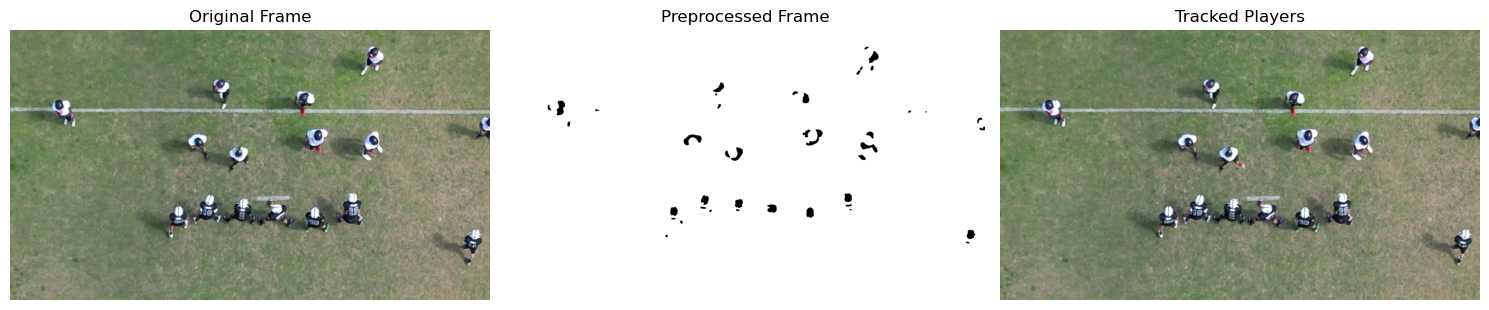

In [3]:
ret, frame = cap.read()
if ret:
    tracker = SoccerTracker()
    
    # Process frame
    binary_frame = tracker.preprocess_frame(frame)
    detections = tracker.detect_players(binary_frame)
    tracker.update_tracks(detections)
    
    # Visualize results
    output_frame = tracker.visualize_tracks(frame)
    
    # Display results using matplotlib
    plt.figure(figsize=(15,5))
    
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Original Frame')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(binary_frame, cmap='gray')
    plt.title('Preprocessed Frame')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
    plt.title('Tracked Players')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [4]:
def process_video(num_frames=50):
    tracker = SoccerTracker()
    frames = []
    
    for _ in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break
            
        binary_frame = tracker.preprocess_frame(frame)
        detections = tracker.detect_players(binary_frame)
        tracker.update_tracks(detections)
        output_frame = tracker.visualize_tracks(frame)
        frames.append(output_frame)
    
    return frames

In [ ]:
cap.release()

Processed 1 frames
Detected 1 players in current frame


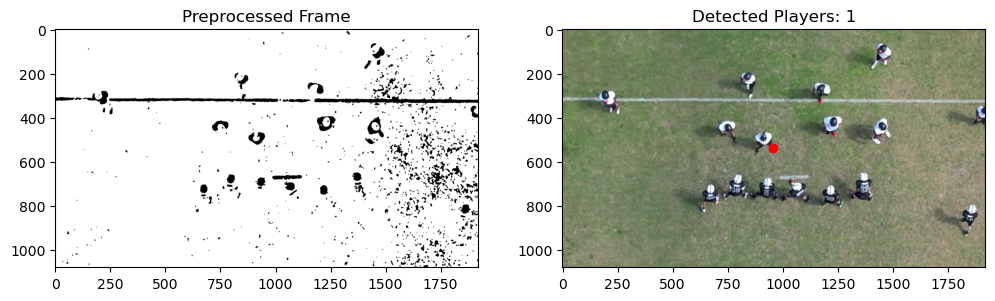

Processed 11 frames
Detected 1 players in current frame


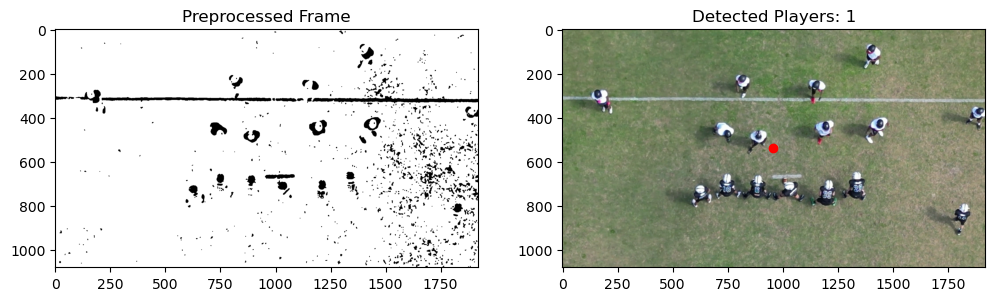

Processed 21 frames
Detected 4 players in current frame


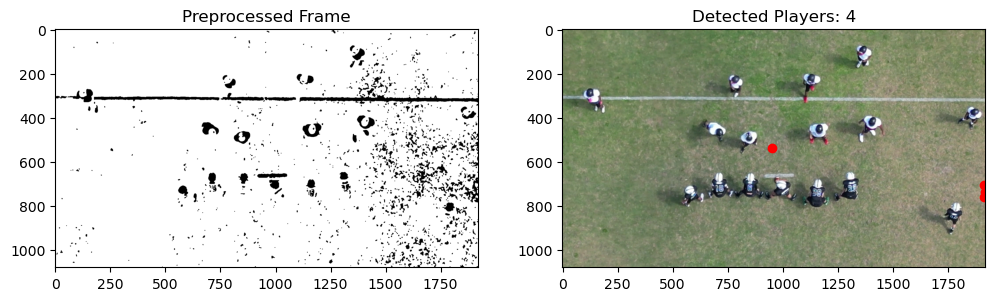

Processed 31 frames
Detected 2 players in current frame


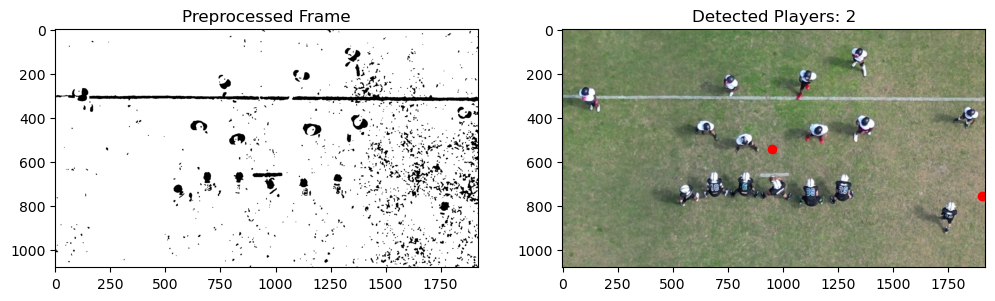

Processed 41 frames
Detected 2 players in current frame


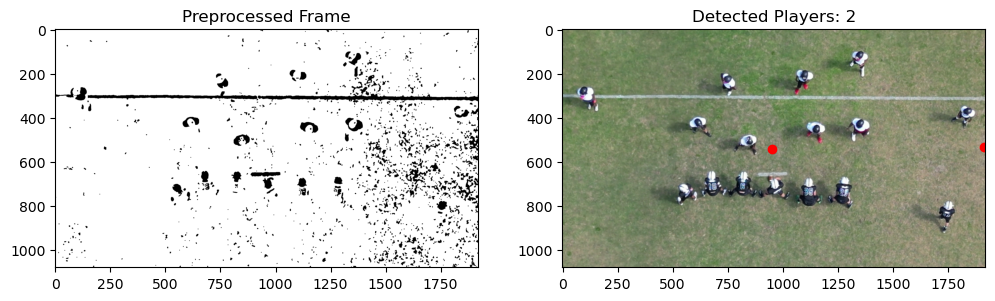

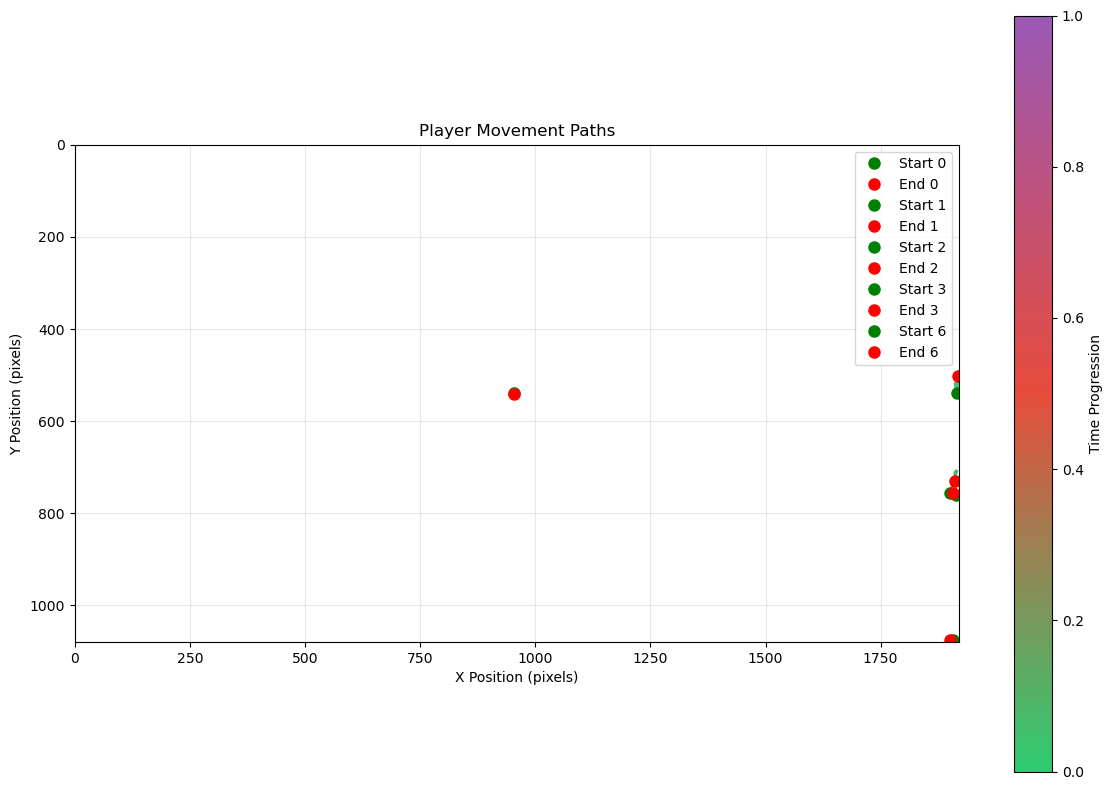

In [7]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

class SoccerTracker:
    def __init__(self):
        self.player_tracks = defaultdict(list)
        self.next_id = 0
        self.min_contour_area = 50  # Reduced to detect smaller players
        self.max_distance = 100  # Increased to maintain tracks better
        
    def preprocess_frame(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        # Adjusted threshold value to detect more players
        _, thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((3,3), np.uint8)  # Smaller kernel
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        return thresh

    # [Previous detect_players and update_tracks methods remain the same]
    def detect_players(self, binary_frame):
        contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
        detections = []
        for contour in contours:
            if cv2.contourArea(contour) > self.min_contour_area:
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detections.append((cx, cy))
        return detections
    
    def update_tracks(self, detections):
        if not self.player_tracks:
            for det in detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1
            return
        
        cost_matrix = np.zeros((len(detections), len(self.player_tracks)))
        for i, det in enumerate(detections):
            for j, track_id in enumerate(self.player_tracks.keys()):
                last_pos = self.player_tracks[track_id][-1]
                distance = np.sqrt((det[0] - last_pos[0])**2 + (det[1] - last_pos[1])**2)
                cost_matrix[i][j] = distance
        
        assigned_tracks = set()
        assigned_detections = set()
        
        while True:
            if np.min(cost_matrix) > self.max_distance:
                break
                
            i, j = np.unravel_index(np.argmin(cost_matrix), cost_matrix.shape)
            if i in assigned_detections or j in assigned_tracks:
                cost_matrix[i][j] = float('inf')
                continue
                
            track_id = list(self.player_tracks.keys())[j]
            self.player_tracks[track_id].append(detections[i])
            assigned_detections.add(i)
            assigned_tracks.add(j)
            cost_matrix[i][j] = float('inf')
        
        for i, det in enumerate(detections):
            if i not in assigned_detections:
                self.player_tracks[self.next_id] = [det]
                self.next_id += 1

def visualize_paths(tracker, frame_shape, min_track_length=5):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal')
    
    colors = [(0.0, '#2ecc71'), (0.5, '#e74c3c'), (1.0, '#9b59b6')]
    custom_cmap = LinearSegmentedColormap.from_list('custom', colors)
    
    for track_id, positions in tracker.player_tracks.items():
        if len(positions) < min_track_length:
            continue
            
        points = np.array(positions)
        segments = np.concatenate([points[:-1, None], points[1:, None]], axis=1)
        
        norm = plt.Normalize(0, len(segments))
        lc = LineCollection(segments, cmap=custom_cmap, norm=norm)
        lc.set_array(np.linspace(0, 1, len(segments)))
        lc.set_linewidth(2)
        
        ax.add_collection(lc)
        
        ax.plot(points[0, 0], points[0, 1], 'go', markersize=8, label=f'Start {track_id}')
        ax.plot(points[-1, 0], points[-1, 1], 'ro', markersize=8, label=f'End {track_id}')
    
    ax.set_xlim(0, frame_shape[1])
    ax.set_ylim(frame_shape[0], 0)
    ax.set_xlabel('X Position (pixels)')
    ax.set_ylabel('Y Position (pixels)')
    ax.set_title('Player Movement Paths')
    
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    # Fixed colorbar
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(0, 1))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Time Progression')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return fig

# Main execution
video_path = 'football.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)
tracker = SoccerTracker()

if not cap.isOpened():
    raise ValueError(f"Error: Could not open video file at {video_path}")

# Process frames
num_frames = 50  # Adjust this number based on how many frames you want to process
processed_frames = []

try:
    for frame_idx in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break
            
        # Show preprocessing result every 10 frames
        binary_frame = tracker.preprocess_frame(frame)
        detections = tracker.detect_players(binary_frame)
        tracker.update_tracks(detections)
        
        if frame_idx % 10 == 0:
            print(f"Processed {frame_idx + 1} frames")
            print(f"Detected {len(detections)} players in current frame")
            
            # Display binary frame and detections
            plt.figure(figsize=(12, 4))
            plt.subplot(121)
            plt.imshow(binary_frame, cmap='gray')
            plt.title('Preprocessed Frame')
            
            plt.subplot(122)
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            for x, y in detections:
                plt.plot(x, y, 'ro')
            plt.title(f'Detected Players: {len(detections)}')
            plt.show()
    
    # Create final visualization
    fig = visualize_paths(tracker, frame.shape)
    plt.show()
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

finally:
    cap.release()
    cv2.destroyAllWindows()

Processed 1 frames
Tracking 5 players
Processed 11 frames
Tracking 5 players
Processed 21 frames
Tracking 5 players
Processed 31 frames
Tracking 5 players
Processed 41 frames
Tracking 5 players
Processed 51 frames
Tracking 5 players
Processed 61 frames
Tracking 5 players
Processed 71 frames
Tracking 5 players
Processed 81 frames
Tracking 5 players
Processed 91 frames
Tracking 5 players
Processed 101 frames
Tracking 5 players
Processed 111 frames
Tracking 5 players
Processed 121 frames
Tracking 5 players
Processed 131 frames
Tracking 5 players
Processed 141 frames
Tracking 5 players
Processed 151 frames
Tracking 5 players
Processed 161 frames
Tracking 5 players
Processed 171 frames
Tracking 5 players
Processed 181 frames
Tracking 5 players
Processed 191 frames
Tracking 5 players


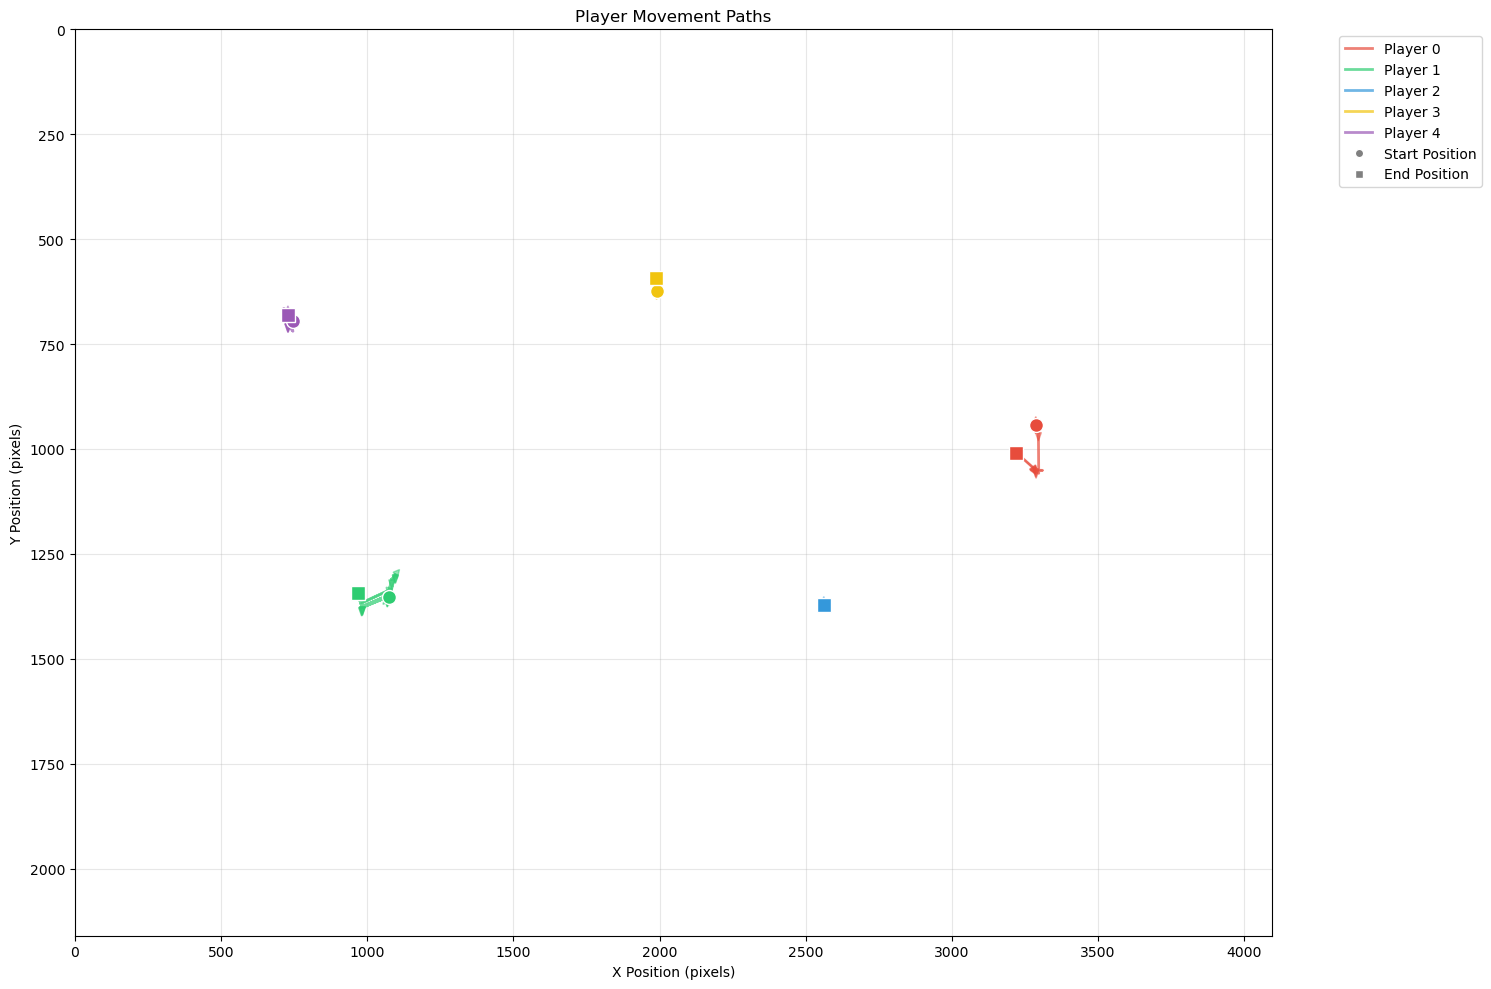


Tracking Summary:
Player 0: tracked for 103 frames, total distance: 414.3 pixels
Player 1: tracked for 164 frames, total distance: 1909.3 pixels
Player 2: tracked for 6 frames, total distance: 42.5 pixels
Player 3: tracked for 13 frames, total distance: 91.4 pixels
Player 4: tracked for 170 frames, total distance: 680.5 pixels


In [6]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

class SoccerTracker:
    def __init__(self, num_players=5):
        self.player_tracks = defaultdict(list)
        self.next_id = 0
        self.num_players = num_players
        self.min_contour_area = 50
        self.max_distance = 100
        
    def preprocess_frame(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((3,3), np.uint8)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        return thresh
    
    def detect_players(self, binary_frame):
        contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, 
                                     cv2.CHAIN_APPROX_SIMPLE)
        
        # Sort contours by area to get the largest ones
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        
        detections = []
        for contour in contours[:self.num_players]:  # Only take the largest contours
            if cv2.contourArea(contour) > self.min_contour_area:
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detections.append((cx, cy))
        return detections
    
    def update_tracks(self, detections):
        if not self.player_tracks:
            # Initialize tracks for the first frame
            for i, det in enumerate(detections[:self.num_players]):
                self.player_tracks[i] = [det]
            return
        
        cost_matrix = np.zeros((len(detections), len(self.player_tracks)))
        for i, det in enumerate(detections):
            for j, track_id in enumerate(self.player_tracks.keys()):
                last_pos = self.player_tracks[track_id][-1]
                distance = np.sqrt((det[0] - last_pos[0])**2 + (det[1] - last_pos[1])**2)
                cost_matrix[i][j] = distance
        
        # Simple greedy assignment
        assigned_tracks = set()
        assigned_detections = set()
        
        while True:
            if np.min(cost_matrix) > self.max_distance:
                break
                
            i, j = np.unravel_index(np.argmin(cost_matrix), cost_matrix.shape)
            if i in assigned_detections or j in assigned_tracks:
                cost_matrix[i][j] = float('inf')
                continue
                
            track_id = list(self.player_tracks.keys())[j]
            self.player_tracks[track_id].append(detections[i])
            assigned_detections.add(i)
            assigned_tracks.add(j)
            cost_matrix[i][j] = float('inf')

def plot_player_paths(tracker, frame_shape):
    plt.figure(figsize=(15, 10))
    
    # Define distinct colors for each player
    colors = ['#e74c3c', '#2ecc71', '#3498db', '#f1c40f', '#9b59b6']
    
    for player_id, positions in tracker.player_tracks.items():
        if len(positions) < 2:  # Skip if not enough positions
            continue
            
        # Convert positions to numpy arrays for easier plotting
        positions = np.array(positions)
        
        # Plot the path
        plt.plot(positions[:, 0], positions[:, 1], 
                color=colors[player_id], 
                linewidth=2, 
                label=f'Player {player_id}',
                alpha=0.7)
        
        # Plot start point
        plt.plot(positions[0, 0], positions[0, 1], 
                'o', 
                color=colors[player_id], 
                markersize=10,
                markeredgecolor='white')
        
        # Plot end point
        plt.plot(positions[-1, 0], positions[-1, 1], 
                's', 
                color=colors[player_id], 
                markersize=10,
                markeredgecolor='white')
        
        # Add direction arrows
        for i in range(0, len(positions) - 1, 10):  # Add arrow every 10 points
            plt.arrow(positions[i, 0], positions[i, 1],
                     positions[i+1, 0] - positions[i, 0],
                     positions[i+1, 1] - positions[i, 1],
                     color=colors[player_id], 
                     head_width=20,
                     head_length=20,
                     alpha=0.5)
    
    plt.xlim(0, frame_shape[1])
    plt.ylim(frame_shape[0], 0)  # Invert Y axis to match image coordinates
    plt.xlabel('X Position (pixels)')
    plt.ylabel('Y Position (pixels)')
    plt.title('Player Movement Paths')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Add legend explaining markers
    plt.plot([], [], 'o', color='gray', label='Start Position', markeredgecolor='white')
    plt.plot([], [], 's', color='gray', label='End Position', markeredgecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf()

# Main execution
video_path = 'soccer.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)
tracker = SoccerTracker(num_players=5)

if not cap.isOpened():
    raise ValueError(f"Error: Could not open video file at {video_path}")

try:
    for frame_idx in range(200):  # Process 50 frames
        ret, frame = cap.read()
        if not ret:
            break
            
        binary_frame = tracker.preprocess_frame(frame)
        detections = tracker.detect_players(binary_frame)
        tracker.update_tracks(detections)
        
        if frame_idx % 10 == 0:
            print(f"Processed {frame_idx + 1} frames")
            print(f"Tracking {len(tracker.player_tracks)} players")
    
    # Create final visualization
    fig = plot_player_paths(tracker, frame.shape)
    plt.show()
    
    # Print tracking statistics
    print("\nTracking Summary:")
    for player_id, positions in tracker.player_tracks.items():
        total_distance = 0
        for i in range(len(positions)-1):
            dx = positions[i+1][0] - positions[i][0]
            dy = positions[i+1][1] - positions[i][1]
            total_distance += np.sqrt(dx*dx + dy*dy)
        print(f"Player {player_id}: tracked for {len(positions)} frames, total distance: {total_distance:.1f} pixels")
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

finally:
    cap.release()
    cv2.destroyAllWindows()

Processed 1 frames
Processed 11 frames
Processed 21 frames
Processed 31 frames
Processed 41 frames
Processed 51 frames
Processed 61 frames
Processed 71 frames
Processed 81 frames
Processed 91 frames
Processed 101 frames
Processed 111 frames
Processed 121 frames
Processed 131 frames
Processed 141 frames
Processed 151 frames
Processed 161 frames
Processed 171 frames
Processed 181 frames
Processed 191 frames

Player Statistics:
--------------------------------------------------

Player 0:
Total Distance: 65.6 feet
Average Speed: 6.7 mph

Player 1:
Total Distance: 42.6 feet
Average Speed: 4.4 mph

Player 2:
Total Distance: 3.1 feet
Average Speed: 0.3 mph

Player 3:
Total Distance: 15.1 feet
Average Speed: 1.5 mph

Player 4:
Total Distance: 29.4 feet
Average Speed: 3.0 mph


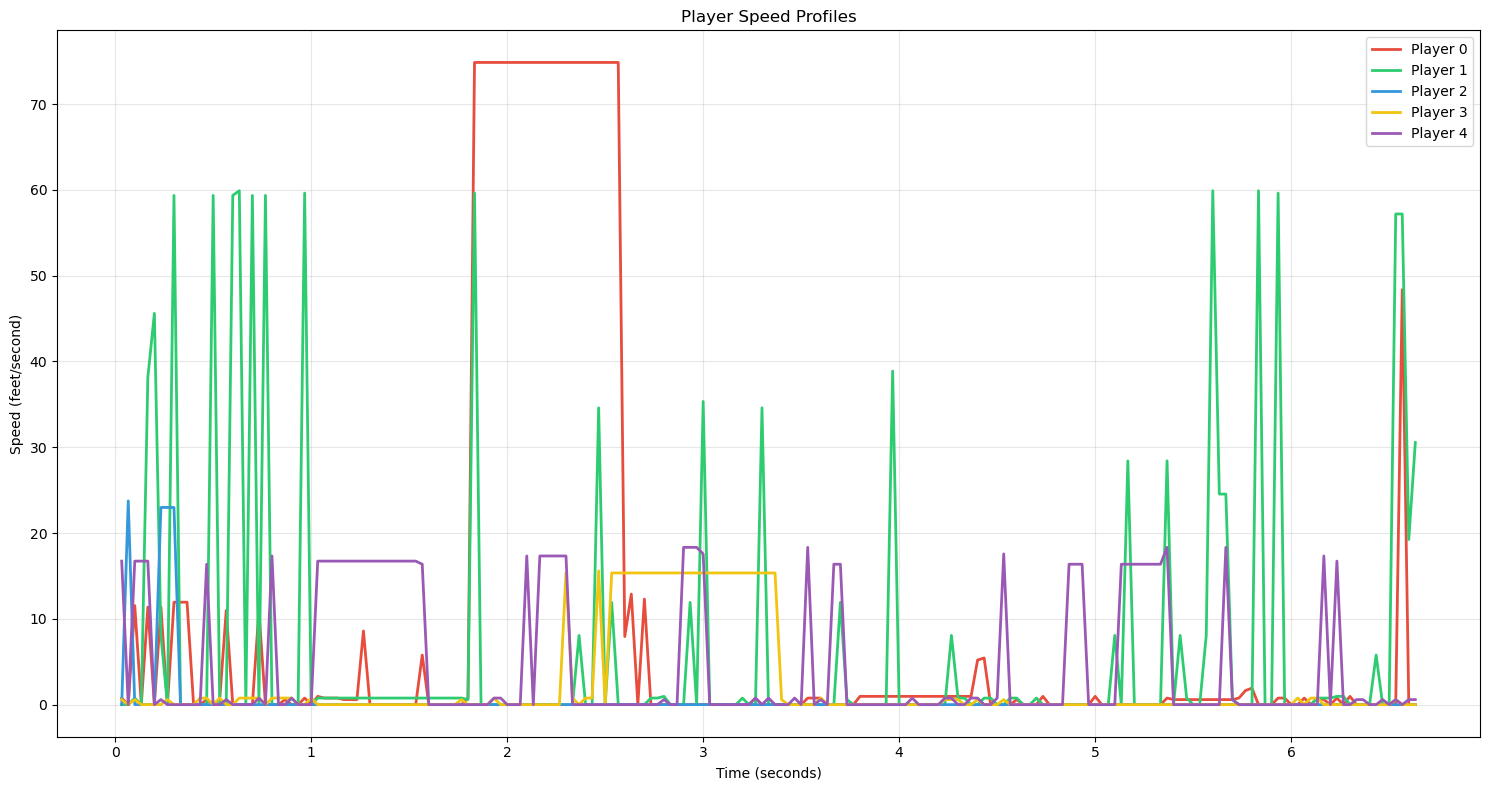

In [15]:
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

# Standard soccer field dimensions in feet
FIELD_LENGTH_FT = 80  # Length of field (longer dimension)
FIELD_WIDTH_FT = 55    # Width of field (shorter dimension)
FRAME_RATE = 30        # Assuming 30 fps, adjust based on your video

class PlayerMetrics:
    def __init__(self, frame_shape):
        self.frame_height, self.frame_width = frame_shape[:2]
        # Calculate conversion factors (pixels to feet)
        self.pixels_to_feet_x = FIELD_LENGTH_FT / self.frame_width
        self.pixels_to_feet_y = FIELD_WIDTH_FT / self.frame_height
        
        # Initialize storage for player metrics
        self.player_distances = defaultdict(float)  # Total distance in feet
        self.player_speeds = defaultdict(list)      # Speed at each frame
        self.player_positions_feet = defaultdict(list)  # Positions in feet
        self.timestamps = []  # Track frame timestamps
        
    def pixel_to_feet(self, x, y):
        """Convert pixel coordinates to feet"""
        feet_x = x * self.pixels_to_feet_x
        feet_y = y * self.pixels_to_feet_y
        return feet_x, feet_y
    
    def update_player_metrics(self, player_tracks, frame_number):
        """Update metrics for all players in current frame"""
        timestamp = frame_number / FRAME_RATE  # Convert frame number to seconds
        self.timestamps.append(timestamp)
        
        for player_id, positions in player_tracks.items():
            if len(positions) < 2:  # Need at least 2 positions to calculate speed
                continue
                
            # Get current and previous positions
            curr_pos = positions[-1]
            prev_pos = positions[-2]
            
            # Convert positions to feet
            curr_x, curr_y = self.pixel_to_feet(curr_pos[0], curr_pos[1])
            prev_x, prev_y = self.pixel_to_feet(prev_pos[0], prev_pos[1])
            
            # Calculate distance in feet
            dx = curr_x - prev_x
            dy = curr_y - prev_y
            distance = np.sqrt(dx*dx + dy*dy)
            
            # Update total distance
            self.player_distances[player_id] += distance
            
            # Calculate speed (feet per second)
            if len(self.timestamps) >= 2:
                dt = self.timestamps[-1] - self.timestamps[-2]
                speed = distance / dt if dt > 0 else 0
                self.player_speeds[player_id].append(speed)
            
            # Store position in feet
            self.player_positions_feet[player_id].append((curr_x, curr_y))
    
    def get_player_stats(self, player_id):
        """Get comprehensive stats for a player"""
        if player_id not in self.player_distances:
            return None
            
        speeds = self.player_speeds[player_id]
        stats = {
            'total_distance_ft': self.player_distances[player_id],
            'avg_speed_fps': np.mean(speeds) if speeds else 0,
            'max_speed_fps': np.max(speeds) if speeds else 0,
            'avg_speed_mph': np.mean(speeds) * 0.681818 if speeds else 0,  # Convert fps to mph
            'max_speed_mph': np.max(speeds) * 0.681818 if speeds else 0
        }
        return stats
    
    def plot_speed_profiles(self):
        """Plot speed profiles for all players"""
        plt.figure(figsize=(15, 8))
        colors = ['#e74c3c', '#2ecc71', '#3498db', '#f1c40f', '#9b59b6']
        
        for player_id, speeds in self.player_speeds.items():
            if len(speeds) < 2:
                continue
                
            timestamps = self.timestamps[-len(speeds):]
            plt.plot(timestamps, speeds, 
                    color=colors[player_id % len(colors)], 
                    label=f'Player {player_id}',
                    linewidth=2)
        
        plt.xlabel('Time (seconds)')
        plt.ylabel('Speed (feet/second)')
        plt.title('Player Speed Profiles')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

# Main execution code
def analyze_player_movement(video_path, num_frames=200):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Error: Could not open video file at {video_path}")
    
    # Read first frame to get dimensions
    ret, frame = cap.read()
    if not ret:
        raise ValueError("Could not read first frame")
    
    # Initialize trackers and metrics
    tracker = SoccerTracker(num_players=5)  # Use your existing SoccerTracker class
    metrics = PlayerMetrics(frame.shape)
    
    try:
        frame_idx = 0
        while frame_idx < num_frames:
            ret, frame = cap.read()
            if not ret:
                break
            
            # Your existing tracking code
            binary_frame = tracker.preprocess_frame(frame)
            detections = tracker.detect_players(binary_frame)
            tracker.update_tracks(detections)
            
            # Update metrics
            metrics.update_player_metrics(tracker.player_tracks, frame_idx)
            
            if frame_idx % 10 == 0:
                print(f"Processed {frame_idx + 1} frames")
            
            frame_idx += 1
        
        # Print final statistics
        print("\nPlayer Statistics:")
        print("-" * 50)
        for player_id in tracker.player_tracks.keys():
            stats = metrics.get_player_stats(player_id)
            if stats:
                print(f"\nPlayer {player_id}:")
                print(f"Total Distance: {stats['total_distance_ft']:.1f} feet")
                print(f"Average Speed: {stats['avg_speed_mph']:.1f} mph")
                #print(f"Maximum Speed: {stats['max_speed_mph']:.1f} mph")
        
        # Plot speed profiles
        metrics.plot_speed_profiles()
        plt.show()
        
        return metrics, tracker
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        
    finally:
        cap.release()
        cv2.destroyAllWindows()

# Execute the analysis
video_path = 'soccer.mp4'  # Replace with your video path
metrics, tracker = analyze_player_movement(video_path)